# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df['species'].fillna('default',inplace=True)
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa
146,4.8,3.0,1.4,0.1,Setosa
147,4.9,3.1,1.5,0.1,Setosa
148,4.9,3.6,1.4,0.1,setosa


In [4]:
df['species'].value_counts()

versicolor    39
setosa        35
virginica     34
Setosa        10
virginica      6
VERSICOLOR     5
 virginica     5
SETOSA         5
VIRGINICA      5
Versicolor     5
default        1
Name: species, dtype: int64

In [5]:
#Veamos los valores que puede tomar species
df['species'].value_counts().index

Index(['versicolor', 'setosa', 'virginica', 'Setosa', 'virginica ',
       'VERSICOLOR', ' virginica', 'SETOSA', 'VIRGINICA', 'Versicolor',
       'default'],
      dtype='object')

In [6]:
#Dejamos todo sin espacios ni mayúscula
df['species'].astype('str')
df['species'] = df['species'].str.lower().str.strip()
df['species'].value_counts().index

Index(['setosa', 'virginica', 'versicolor', 'default'], dtype='object')

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

<AxesSubplot:>

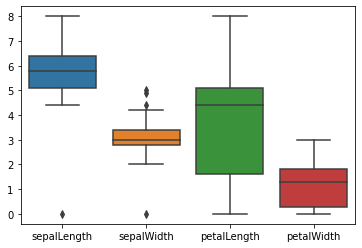

In [7]:
df['sepalLength'].fillna(0,inplace=True)
df['sepalWidth'].fillna(0,inplace=True)
df['petalLength'].fillna(0,inplace=True)
df['petalWidth'].fillna(0,inplace=True)

df_1=df.drop(['species'], axis=1)

sns.boxplot(data=df_1)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [8]:
lista_label = []

for i in range(len(df)):
    if df['sepalLength'][i]<4.0 or df['sepalLength'][i]>7.0:
        lista_label.append("sepalLength")
        
    elif df['sepalWidth'][i]<2.0 or df['sepalWidth'][i]>4.5:
        lista_label.append("sepalWidth")
        
    elif df['petalLength'][i]<1.0 or df['petalLength'][i]>7.0:
        lista_label.append("petalLength")
        
    elif df['petalWidth'][i]<0.1 or df['petalWidth'][i]>2.5:
        lista_label.append("petalWidth")
        
    else:           
        lista_label.append('Dentro de los rangos')
        
df['label']=lista_label

df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,petalWidth
1,7.2,3.6,6.1,2.5,virginica,sepalLength
2,6.3,3.3,6.0,2.5,virginica,Dentro de los rangos
3,6.7,3.3,5.7,2.5,virginica,Dentro de los rangos
4,6.3,3.4,5.6,2.4,virginica,Dentro de los rangos
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,Dentro de los rangos
146,4.8,3.0,1.4,0.1,setosa,Dentro de los rangos
147,4.9,3.1,1.5,0.1,setosa,Dentro de los rangos
148,4.9,3.6,1.4,0.1,setosa,Dentro de los rangos


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

<AxesSubplot:xlabel='petalLength', ylabel='sepalLength'>

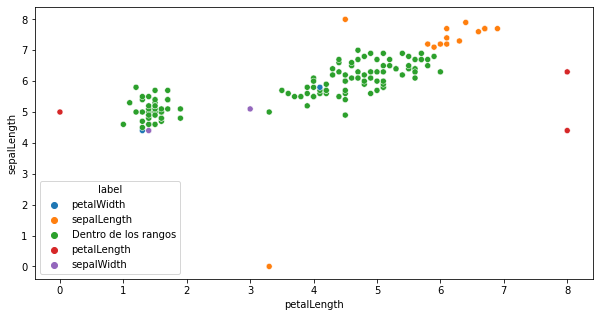

In [9]:
# tamano del grafico
plt.figure(figsize=(10, 5)) 

# graficar
sns.scatterplot(
        x='petalLength',
        y='sepalLength',
        data=df,
        hue='label',
        
)

<AxesSubplot:xlabel='petalWidth', ylabel='sepalWidth'>

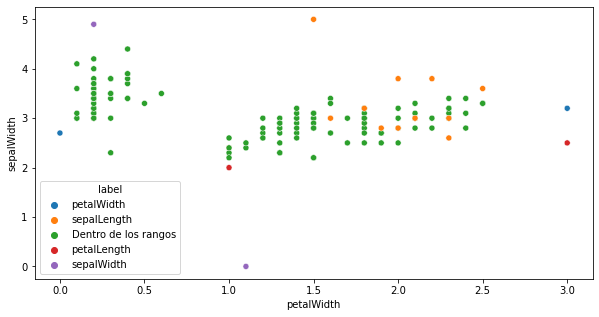

In [10]:
# tamano del grafico
plt.figure(figsize=(10, 5)) 

# graficar
sns.scatterplot(
        x='petalWidth',
        y='sepalWidth',
        data=df,
        hue='label',
        
)

Vemos en ambos gráficos que los largos y anchos de los sépalos y los pétalos están en su mayoría dentro de los rangos, además podemos observar que la columna sepalLength es la que mas errada está.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [11]:
mask_sl =  df['sepalLength']<=7.0
mask_sl1 =  df['sepalLength']>=4.0

mask_sw =  df['sepalWidth']<=4.5
mask_sw1 = df['sepalWidth']>=2.0

mask_pl =  df['petalLength']<=7.0
mask_pl1 = df['petalLength']>=1.0

mask_pw =  df['petalWidth']<=2.5
mask_pw1 = df['petalWidth']>=0.1

In [12]:
df_filtrado = df[mask_sl & mask_sw & mask_pl & mask_pw & mask_sl1 & mask_sw1 & mask_pl1 & mask_pw1]

In [13]:
df_filtrado

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
2,6.3,3.3,6.0,2.5,virginica,Dentro de los rangos
3,6.7,3.3,5.7,2.5,virginica,Dentro de los rangos
4,6.3,3.4,5.6,2.4,virginica,Dentro de los rangos
5,6.7,3.1,5.6,2.4,virginica,Dentro de los rangos
6,5.8,2.8,5.1,2.4,virginica,Dentro de los rangos
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,Dentro de los rangos
146,4.8,3.0,1.4,0.1,setosa,Dentro de los rangos
147,4.9,3.1,1.5,0.1,setosa,Dentro de los rangos
148,4.9,3.6,1.4,0.1,setosa,Dentro de los rangos


<AxesSubplot:xlabel='petalLength', ylabel='sepalLength'>

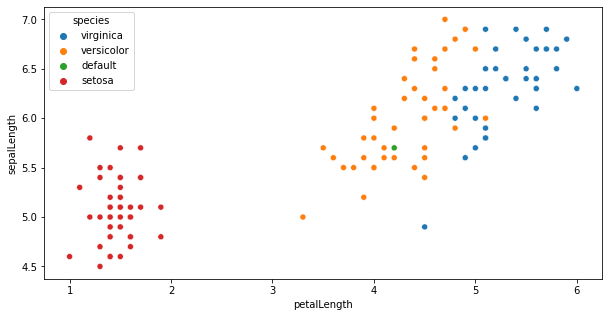

In [14]:
# tamano del grafico
plt.figure(figsize=(10, 5)) 

# graficar
sns.scatterplot(
        x='petalLength',
        y='sepalLength',
        data=df_filtrado,
        hue='species',
        
)